In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Problem 1:

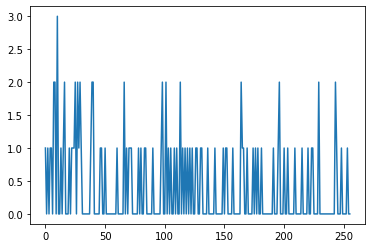

In [33]:
random_vector = np.random.randint(0, 256, 100)

histogram = np.zeros(256, dtype = np.uint32)
for i in range(100):
    histogram[random_vector[i]] = histogram[random_vector[i]] + 1;
    
plt.plot(np.arange(256), histogram)

Problem 2

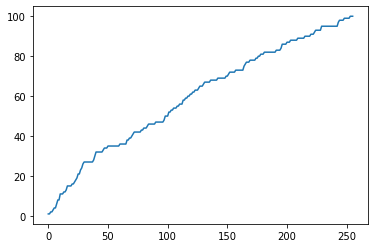

In [34]:
cdf = np.zeros(256, dtype = np.uint32)

cdf[0] = histogram[0]
for i in range(1, 256):
    cdf[i] = histogram[i] + cdf[i-1]

plt.plot(np.arange(256), cdf)

Problem 3

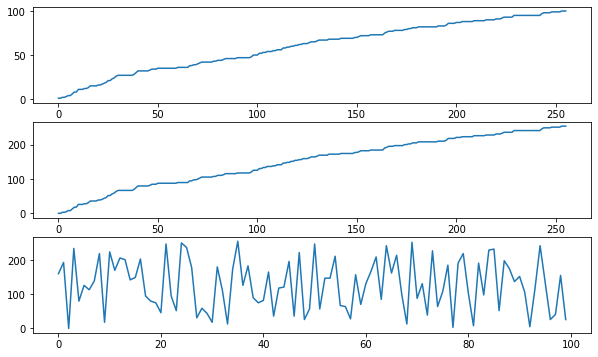

In [35]:
L = 256.0
M = 99.0
cdf_min = 0

h = np.zeros(256, dtype = np.float32)

for i in range(256):
    if cdf[i] > 0:
        cdf_min = cdf[i]
        break;
        
h = np.rint((np.float32(cdf) - cdf_min) / M * (L - 1))
h[h<0] = 0
h[h>255] = 255

random_vector_equalized = np.zeros(100, np.uint8)
for i in range(100):
    random_vector_equalized[i] = h[random_vector[i]];  
    
plt.figure(figsize=(10,6)) 
plt.subplot(311)
plt.plot(np.arange(256), cdf)
plt.subplot(312)
plt.plot(np.arange(256), h)
plt.subplot(313)
plt.plot(np.arange(100), random_vector_equalized)
        

        

Problem 4

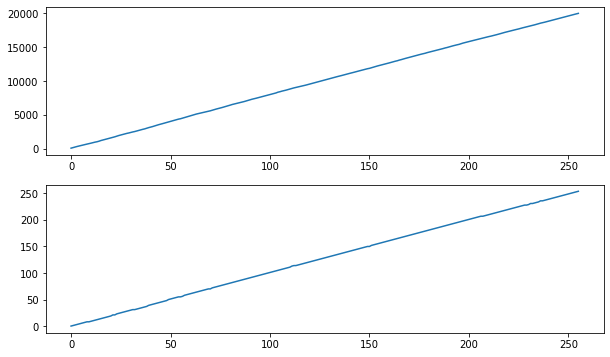

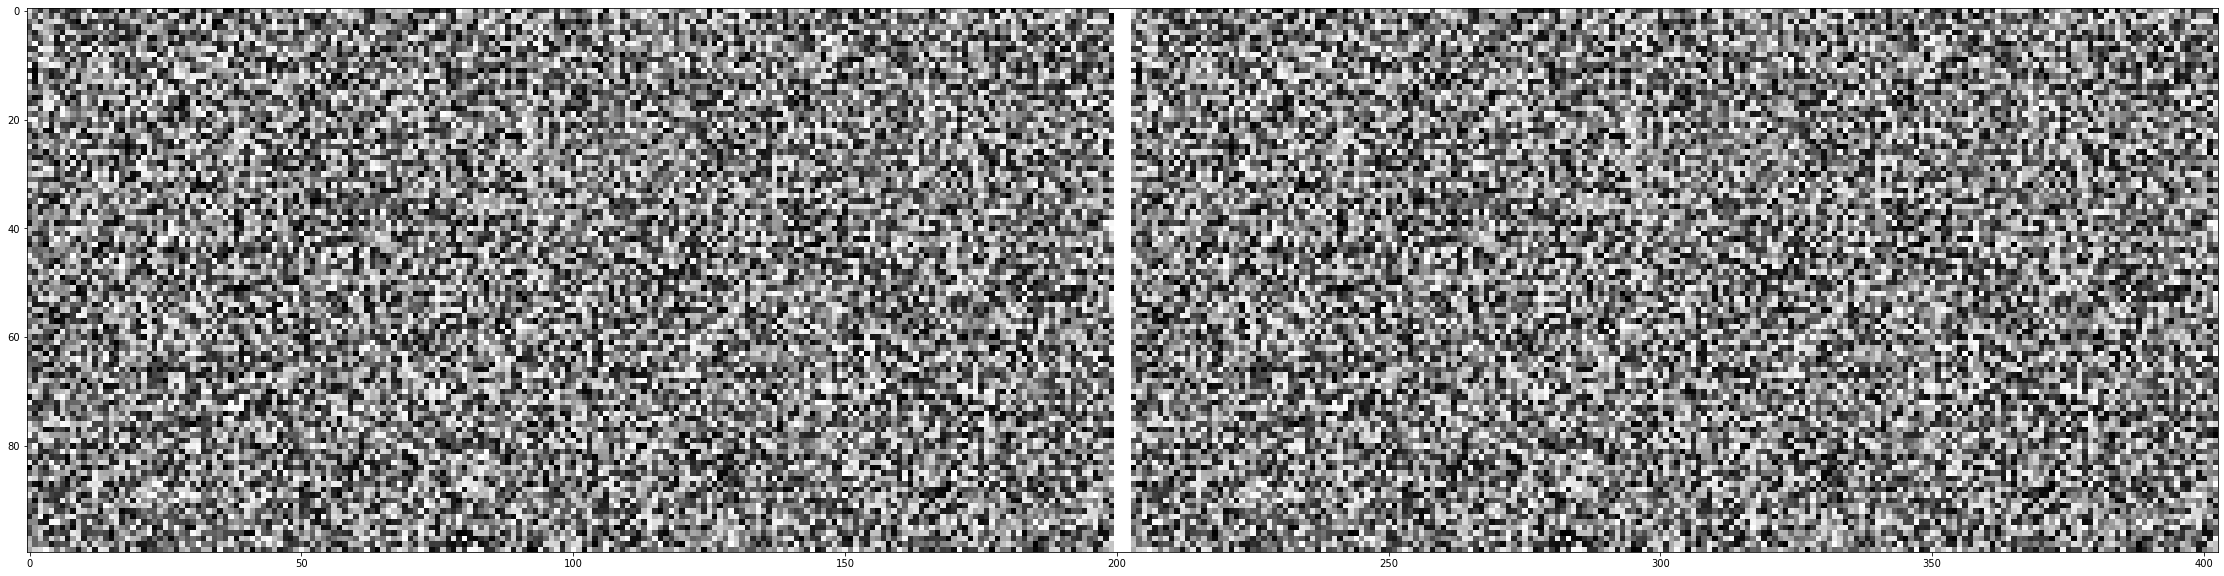

In [36]:
random_matrix = np.random.randint(0, 256, [100, 200])
(r, c) = random_matrix.shape

histogram = np.zeros(256, dtype = np.uint32)

for i in range(r):
    for j in range(c):
        histogram[random_matrix[i, j]] = histogram[random_matrix[i, j]] + 1
        
cdf = np.zeros(256, np.uint32)
cdf[0] = histogram[0]
for i in range(1, 256):
   cdf[i] = (histogram[i] + cdf[i-1])

cdf_min = 0
for i in range(256):
    if cdf[i] > 0:
        cdf_min = cdf[i];
        break;

L = 256.0
M = np.float32(r * c - 1)

h = np.zeros(256, dtype=np.float32)
h = np.rint((np.float32(cdf)-cdf_min) / M * (L - 1))

plt.figure(figsize=(10,6)) 
plt.subplot(211)
plt.plot(np.arange(256), cdf)
plt.subplot(212)
plt.plot(np.arange(256), h)

matrix_equalized = np.zeros((r, c), dtype = np.uint8)
for i in range(r):
    for j in range(c):
        matrix_equalized[i, j] = h[random_matrix[i, j]]
               
plt.figure(figsize=(40,10)) 
plt.imshow(np.concatenate((random_matrix, 255 * np.ones((r, 3)), matrix_equalized), axis = 1), 'gray')



Problem 5

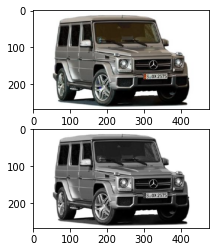

In [37]:
cube_bgr = cv2.imread("cube.jpg")
cube_grayscale = cv2.cvtColor(cube_bgr, cv2.COLOR_BGR2GRAY)

plt.subplot(211)
plt.imshow(cube_bgr)

plt.subplot(212)
plt.imshow(cube_grayscale, 'gray')

Problem 6

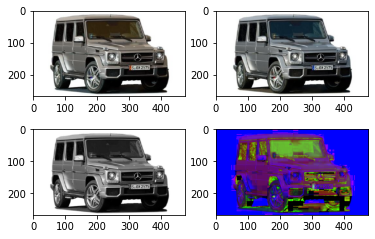

In [38]:
cube_bgr = cv2.imread("cube.jpg", cv2.IMREAD_COLOR)
cube_rgb = cv2.cvtColor(cube_bgr, cv2.COLOR_BGR2RGB)
cube_grayscale = cv2.cvtColor(cube_bgr, cv2.COLOR_BGR2GRAY)
cube_hsv = cv2.cvtColor(cube_bgr, cv2.COLOR_BGR2HSV)
plt.subplot(221)
plt.imshow(cube_bgr)
plt.subplot(222)
plt.imshow(cube_rgb)
plt.subplot(223)
plt.imshow(cube_grayscale, 'gray')
plt.subplot(224)
plt.imshow(cube_hsv)

Problem 7

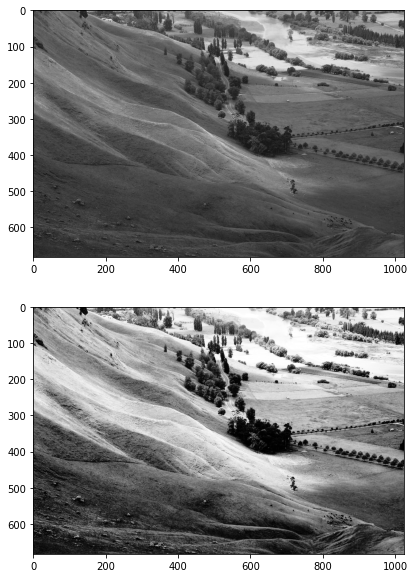

In [39]:
input = cv2.imread("gray.jpg")
grayscale = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)

(r, c) = grayscale.shape

histogram = np.zeros((256,), dtype = np.uint32)

for i in range(r):
    for j in range(c):
        histogram[grayscale[i, j]] = histogram[grayscale[i, j]] + 1        
    
cdf = np.zeros(256, dtype = np.uint32)
cdf[0] = histogram[0]
for i in range(1, 256):
   cdf[i] = histogram[i] + cdf[i-1]

cdf_min = 0
for i in range(256):
    if cdf[i] > 0:
        cdf_min = cdf[i];
        break;
        
L = 256.0
M = np.float32(r * c - 1)

h = np.zeros(256, dtype=np.float32)
h = np.rint(((np.float32(cdf) - cdf_min) / M) * (L - 1))

h[h < 0] = 0
h[h > 255] = 255

grayscale_equalized = np.zeros((r, c), dtype = np.uint8)
for i in range(r):
    for j in range(c):
        grayscale_equalized[i, j] = h[grayscale[i, j]]
        
plt.figure(figsize=(40,10))   
plt.subplot(211)
plt.imshow(grayscale, 'gray')
plt.subplot(212)
plt.imshow(grayscale_equalized, 'gray')

Problem 7 (using numpy and open cv)

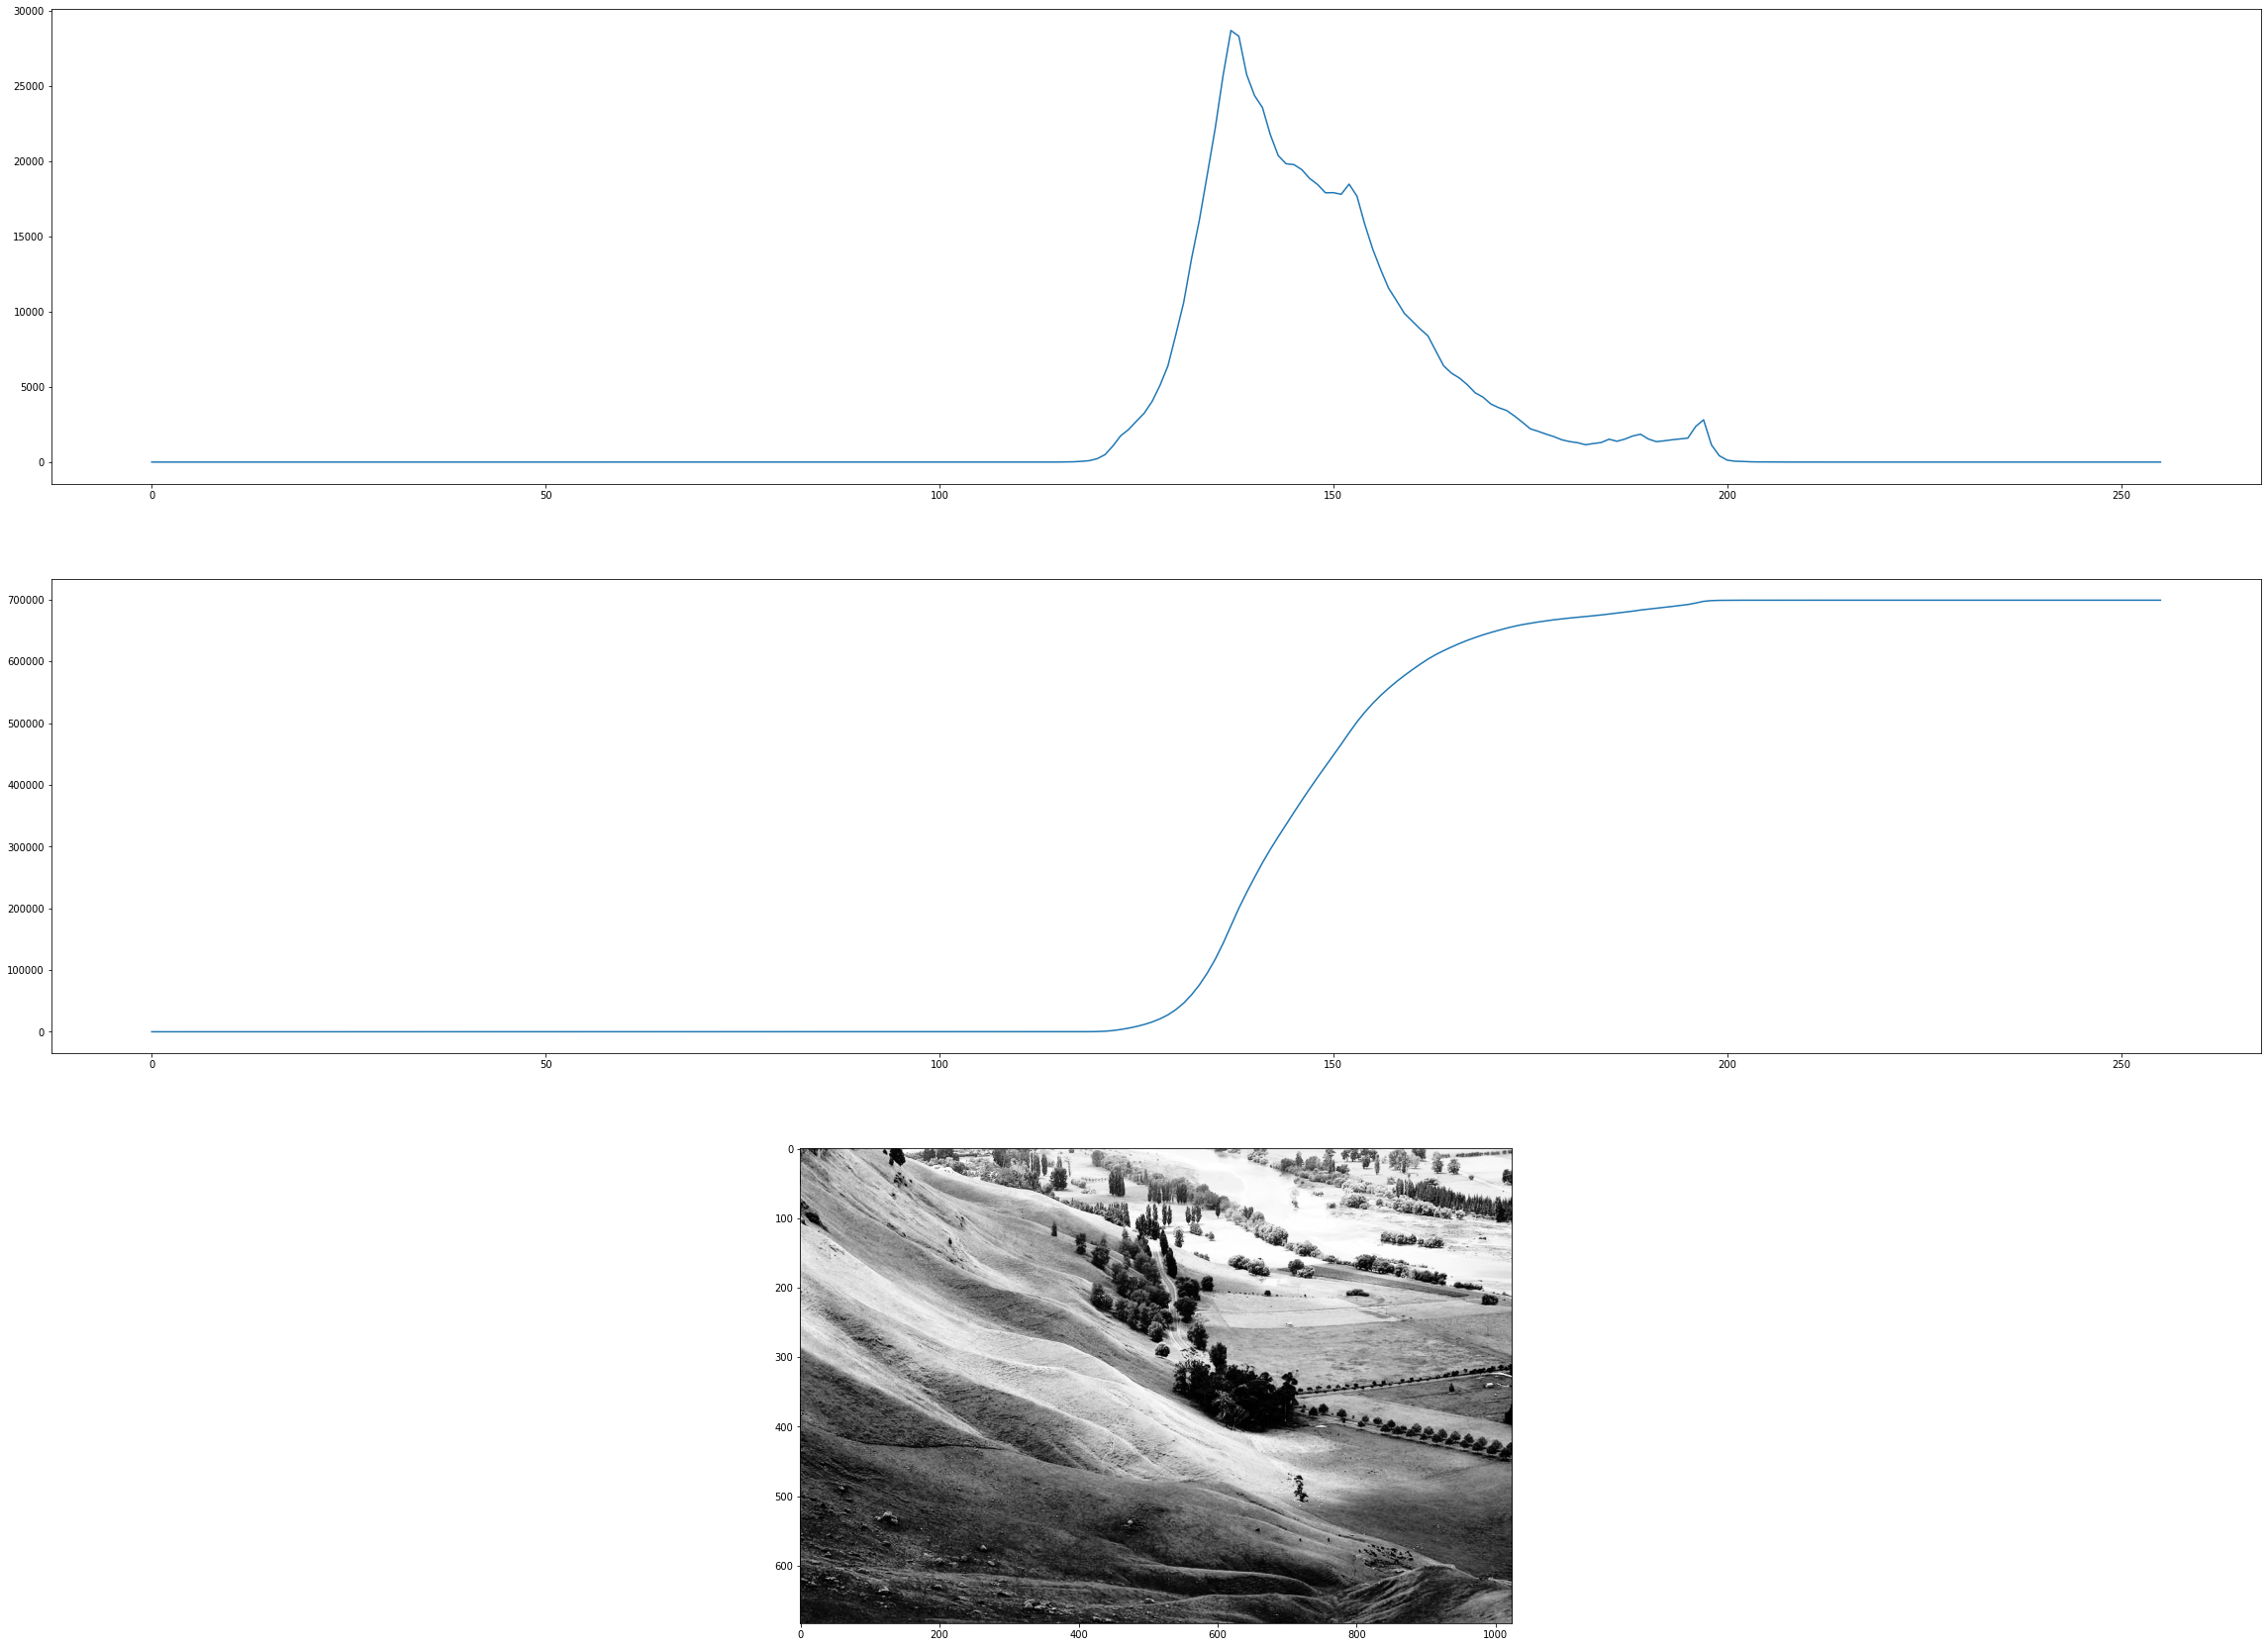

In [40]:
histogram_np, _ = np.histogram(grayscale, bins=np.arange(257))
cdf_np = np.cumsum(histogram_np)
grayscale_equalized_opencv = cv2.equalizeHist(grayscale)

plt.figure(figsize = (40, 30))
plt.subplot(311)
plt.plot(np.arange(256), histogram_np)
plt.subplot(312)
plt.plot(np.arange(256), cdf_np)
plt.subplot(313)
plt.imshow(grayscale_equalized_opencv, 'gray')

Problem 8

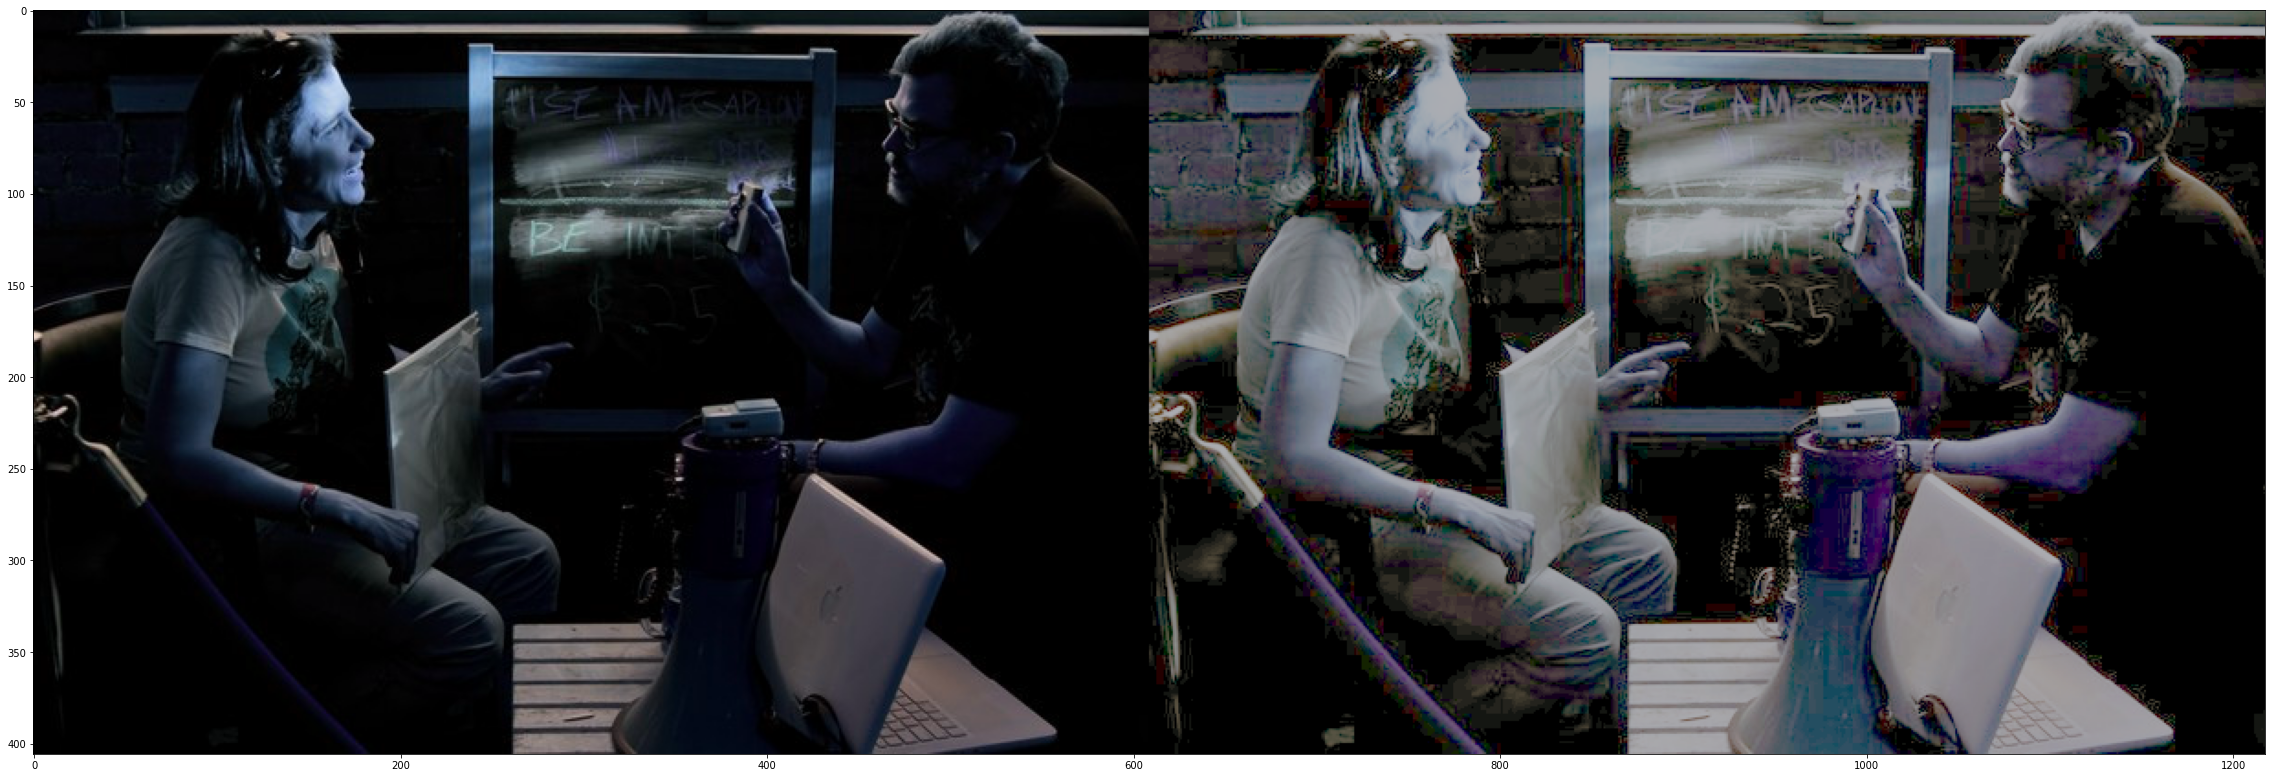

In [88]:
input = cv2.imread("color.jpg")

(rows, cols, colour) = input.shape;

histogram = np.zeros((3, 256), dtype = np.uint32)

for c in range(colour):
    for i in range(rows):
        for j in range(cols):
            histogram[c, input[i, j, c]] = histogram[c, input[i, j, c]] + 1
            
cdf = np.zeros((3, 256), dtype = np.uint32)
for c in range(colour):
    cdf[c, 0] = histogram[c, 0]
    for i in range(1, 256):
       cdf[c, i] = histogram[c, i] + cdf[c, i-1]

cdf_min = np.zeros(3)
for c in range(colour):
    for i in range(256):
        if cdf[c, i] > 0:
            cdf_min[c] = cdf[c, i];
            break;
            
L = 256.0
M = np.float32(rows * cols - 1)

h = np.zeros((3, 256), dtype=np.float32)
for c in range(colour):
    h[c,:] = np.rint(((np.float32(cdf[c]) - cdf_min[c]) / M) * (L - 1))
    h[c,:][h[c,:] < 0] = 0
    h[c, :][h[c, :] > 255] = 255

input_equalized = np.zeros((rows, cols, colour), dtype = np.uint32)
for c in range(colour):
    for i in range(rows):
        for j in range(cols):
            input_equalized[i, j, c] = h[c, input[i, j, c]]
            
plt.figure(figsize = (40, 30))
plt.imshow(np.concatenate((input, input_equalized), axis = 1))